In [18]:
# Appendix III

import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt

In [23]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add noise per instructions. (Also tried to add +0.5 to each of train and test, not saved)
x_train_noisy = x_train  * np.random.normal(loc=0.0, scale=0.5, size=x_train.shape) 
x_test_noisy = x_test * np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [20]:
input_img = Input(shape=(28, 28, 1))

# Encoder with downsampling and bottleneck layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder with upsampling
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
# Training
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1712 - val_loss: 0.1194
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1146 - val_loss: 0.1101
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1090 - val_loss: 0.1064
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.1061 - val_loss: 0.1043
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1043 - val_loss: 0.1028
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1029 - val_loss: 0.1018
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1020 - val_loss: 0.1009
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1012 - val_loss: 0.1002
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1005 - val_loss: 0.1000
Epoch 10/10
469/469 [==============================] - 13s 27ms/step - loss: 0.100

313/313 [==============================] - 1s 4ms/step


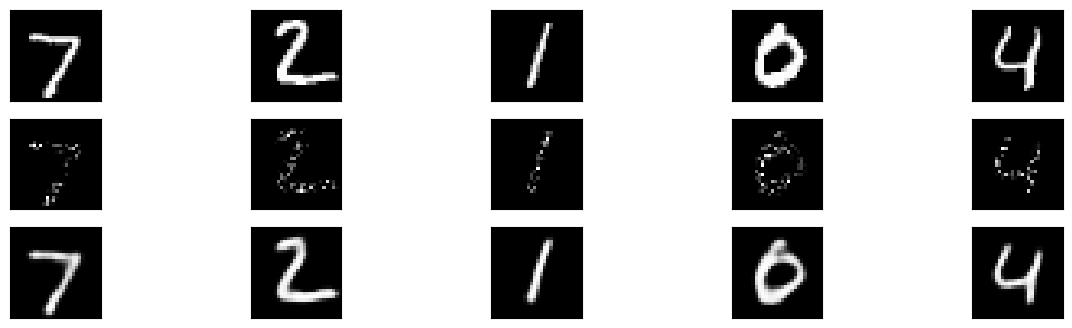

In [22]:
# Prediction
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plotting
n = 5  # Number of samples to show

plt.figure(figsize=(15, 4))
for i in range(n):
    
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy input
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()